In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score,classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('Cardio.csv')


In [2]:
df.head()

,id,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age_days     70000 non-null  int64  
 2   age_year     70000 non-null  float64
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 7.5 MB


In [4]:
df.columns

Index(['id', 'age_days', 'age_year', 'gender', 'height', 'weight', 'ap_hi',
       'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [5]:
df.head()

,id,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
df.shape

(70000, 14)

In [7]:
df.describe()

,id,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.nunique()

id             70000
age_days        8076
age_year        8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [9]:
df.isnull().sum()

id             0
age_days       0
age_year       0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [10]:
df.drop(['id','age_days'], axis=1)

,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52.712329,2,168,76.0,120,80,1,1,1,0,1,0
69996,61.920548,1,158,126.0,140,90,2,2,0,0,1,1
69997,52.235616,2,183,105.0,180,90,3,1,0,1,0,1
69998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
Correlation= df.corr()

<AxesSubplot:>

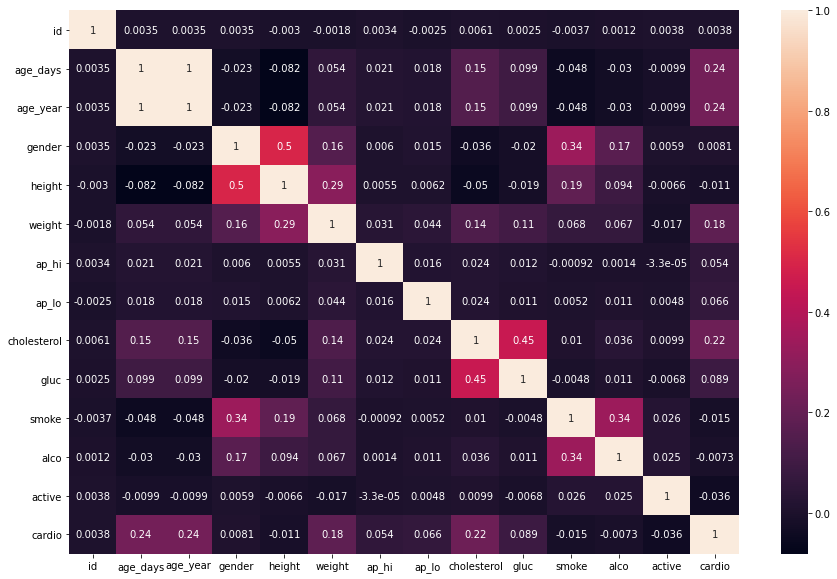

In [5]:
plt.figure(figsize=(15,10))
sns.heatmap(Correlation, xticklabels =Correlation.columns, yticklabels=Correlation.columns,annot=True)
#found correlation with cardio and with other features ***********


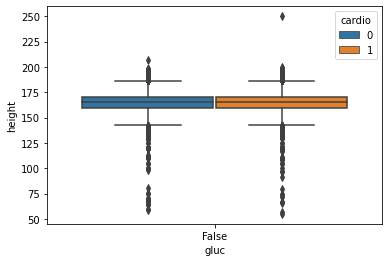

In [8]:
df["gluc"] = df["height"].isin(["ap_hi", "ap_lo"])
ax = sns.boxplot(x="gluc", y="height", hue="cardio",
                 data=df)

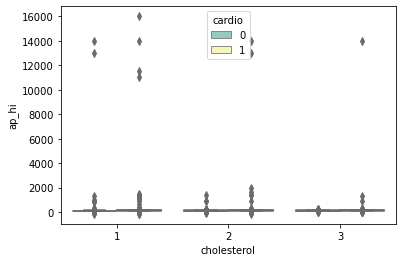

In [14]:
plt.plot(figsize=(20,20))
ax =sns.boxplot(x='cholesterol', y='ap_hi', hue='cardio', data=df, palette="Set3")

/Users/anwraljhny/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cholesterol', ylabel='count'>

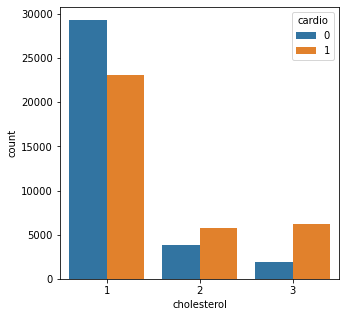

In [15]:
plt.figure(figsize=(5,5))
plt.subplot()
sns.countplot('cholesterol',hue='cardio',data=df)


/Users/anwraljhny/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

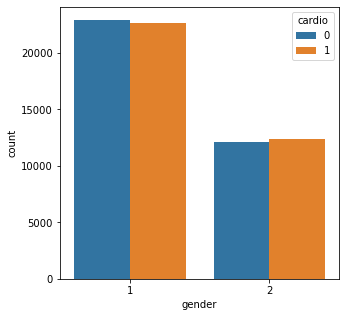

In [16]:
plt.figure(figsize=(5,5))
sns.countplot('gender',hue='cardio',data=df)


In [17]:
df.columns

Index(['id', 'age_days', 'age_year', 'gender', 'height', 'weight', 'ap_hi',
       'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [18]:
feature=['id', 'age_days', 'age_year', 'gender', 'height', 'weight', 'ap_hi',
       'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

In [19]:
list(enumerate(feature))

[(0, 'id'),
 (1, 'age_days'),
 (2, 'age_year'),
 (3, 'gender'),
 (4, 'height'),
 (5, 'weight'),
 (6, 'ap_hi'),
 (7, 'ap_lo'),
 (8, 'cholesterol'),
 (9, 'gluc'),
 (10, 'smoke'),
 (11, 'alco'),
 (12, 'active'),
 (13, 'cardio')]

In [ ]:
sns.pairplot(df)

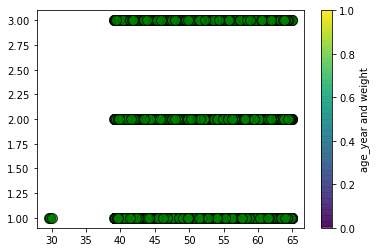

In [21]:
import matplotlib.pyplot as plt
plt.scatter('age_year', 'cholesterol',c='green',s=100,edgecolor='black',linewidth=1,alpha=0.75, data=df, marker='o')
cbar=plt.colorbar()
cbar.set_label('age_year and weight')

In [ ]:
#plt.scatter('ap_lo', 'cardio',c='blue',s=100,edgecolor='black',linewidth=1,alpha=0.75, data=df, marker='o')
#cbar=plt.colorbar()
#cbar.set_label('ap_lo and weight')

<AxesSubplot:title={'center':'Genders (1 - Female; 2 - Male)'}, xlabel='Gender', ylabel='Numbers'>

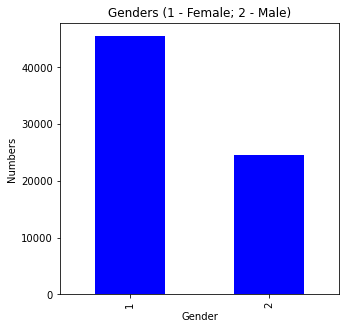

In [22]:
fig, ax = plt.subplots(figsize = (5, 5))
ax.set_title('Genders (1 - Female; 2 - Male)')
ax.set_xlabel("Gender")
ax.set_ylabel("Numbers")#how much
df["gender"].value_counts().plot(ax = ax, kind = "bar", color='blue')

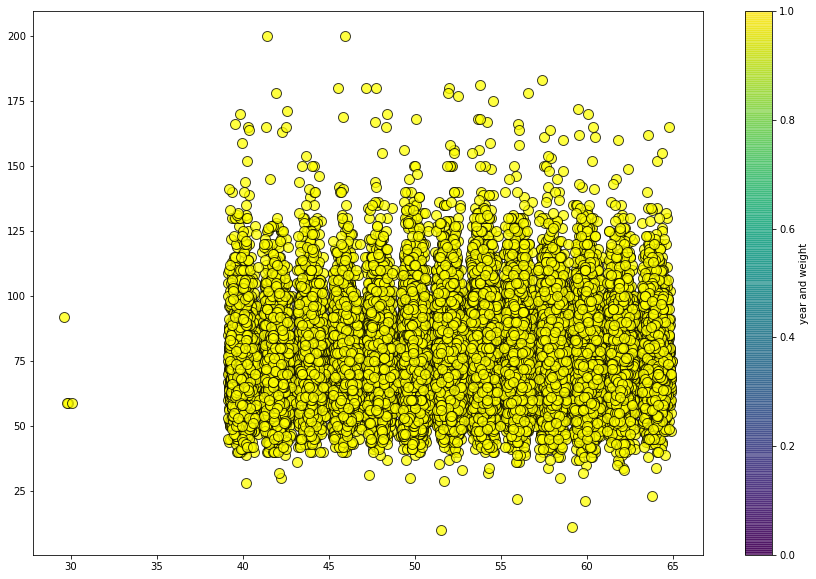

In [84]:

plt.figure(figsize=(15, 10))
plt.scatter('age_year', 'weight',c='yellow',s=100,edgecolor='black',linewidth=1,alpha=0.75, data=df, marker='o')
cbar=plt.colorbar()
cbar.set_label('year and weight')

<AxesSubplot:xlabel='age_year', ylabel='weight'>

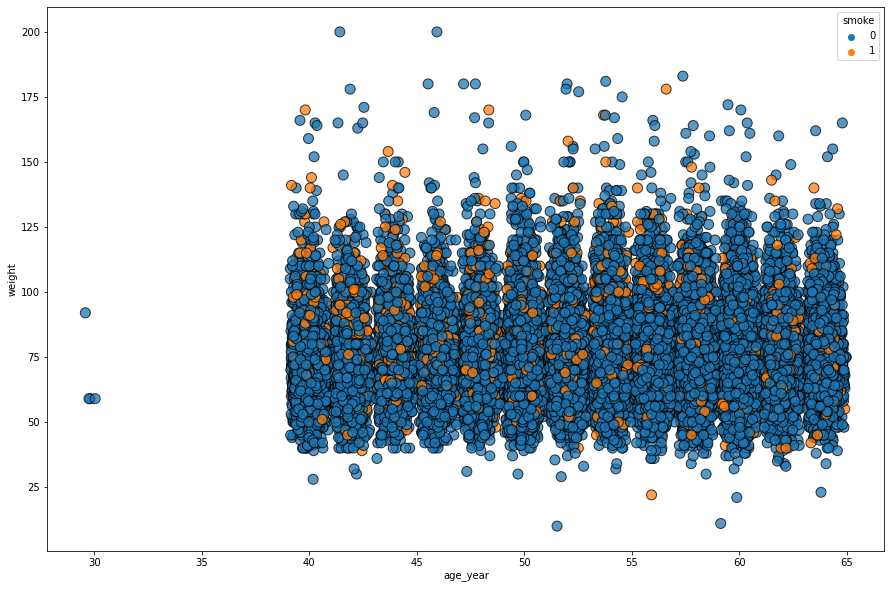

In [24]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='age_year', y='weight', hue='smoke',s=100,edgecolor='black',linewidth=1,alpha=0.75, data=df, marker='o')

<AxesSubplot:xlabel='age_year', ylabel='weight'>

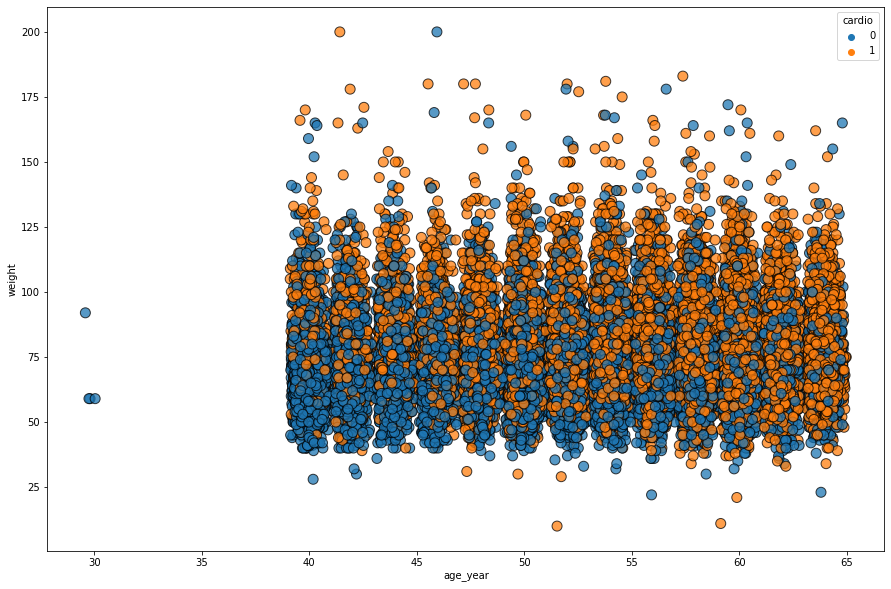

In [16]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='age_year', y='weight',  hue='cardio',s=100,edgecolor='black',linewidth=1,alpha=0.75, data=df, marker='o')

In [7]:
x= df.loc[:,"age_year":"active"]
y=df["cardio"]
#x_train, x_test, y_train, y_test = train_test_split(x,y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [8]:
y_train.shape

(56000,)

In [9]:
x_train.shape

(56000, 11)

In [10]:
x_test

,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
46730,59.643836,1,156,64.0,140,80,2,1,0,0,1
48393,59.934247,1,170,85.0,160,90,1,1,0,0,1
41416,63.753425,1,151,90.0,130,80,1,1,0,0,1
34506,54.084932,1,159,97.0,120,80,1,1,0,0,1
43725,50.397260,1,164,68.0,120,80,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
21525,56.136986,2,172,70.0,120,80,1,1,0,0,0
16276,46.019178,2,174,96.0,120,80,1,2,0,0,1
24390,61.936986,1,165,66.0,110,80,1,1,0,0,0
28061,53.890411,1,157,89.0,120,80,3,3,0,0,1


In [11]:
lm1 = LogisticRegression()

In [12]:
##lm1.fit(x_train ,df.loc[:,"age_year":"active"], y_train)
lm1.fit(x_train[["age_year","active"]], y_train)

LogisticRegression()

In [13]:
lm1.score(x_train[["age_year","active"]], y_train)

0.5955357142857143

In [14]:
lm1.fit(x_train, y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
lm1.score(x_train, y_train)

0.7050714285714286

In [16]:
##lm1.fit(x_train ,df.loc[:,"age_year":"active"], y_train)
lm1.fit(x_train, y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
lm1.score(x_train, y_train)

0.7050714285714286

In [32]:
lm1.predict_proba(x_test)

array([[0.6, 0.4],
       [0.2, 0.8],
       [0.4, 0.6],
       ...,
       [0.6, 0.4],
       [0.6, 0.4],
       [0.4, 0.6]])

In [36]:
y_expect=y_test
y_pred=lm1.predict(x_test)
print(classification_report(y_expect,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72      6988
           1       0.73      0.67      0.70      7012

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000



In [27]:
lm2 = KNeighborsClassifier(3)

In [28]:
lm2.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
lm2.score(x_train, y_train)

0.8151428571428572

In [30]:
lm2.predict_proba(x_test)

array([[0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       ...,
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667]])

In [35]:
y_expect=y_test
y_pred=lm2.predict(x_test)
print(classification_report(y_expect,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.69      0.68      6988
           1       0.68      0.65      0.66      7012

    accuracy                           0.67     14000
   macro avg       0.67      0.67      0.67     14000
weighted avg       0.67      0.67      0.67     14000



In [50]:
lm3=RandomForestClassifier()

In [51]:
lm3.fit(x_train, y_train)

RandomForestClassifier()

In [52]:
lm3.score(x_train, y_train)

0.9998035714285715

In [59]:
y_expect=y_test
y_pred=lm3.predict(x_test)
print(classification_report(y_expect,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      6988
           1       0.72      0.70      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



In [55]:
lm4=DecisionTreeClassifier()

In [56]:
lm4.fit(x_train, y_train)

DecisionTreeClassifier()

In [61]:
decisiontree = DecisionTreeClassifier()

In [57]:
lm4.score(x_train, y_train)
#better

0.9998214285714285

In [71]:
print(sklearn.metrics.confusion_matrix(y_test,y_pred))

[[5087 1901]
 [2081 4931]]


In [58]:
y_expect=y_test
y_pred=lm4.predict(x_test)
print(classification_report(y_expect,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.62      0.63      6988
           1       0.63      0.64      0.63      7012

    accuracy                           0.63     14000
   macro avg       0.63      0.63      0.63     14000
weighted avg       0.63      0.63      0.63     14000



In [77]:
lm4.predict_proba(x_test)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])